In [14]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a Dropout layer
classifier.add(Dropout(0.25))

classifier.add(Conv2D(128, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a Dropout layer
classifier.add(Dropout(0.5))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.5))


classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = SGD(0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

print(classifier.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 128)      

In [1]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os

In [4]:
def anticlockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, -angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

def increase_brightness(img, value=30):
    hsv= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(hsv)
    
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

In [12]:
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip,
                      'increase brightness': increase_brightness,
                      'sharpening image': unsharp_mask
                 }                #use dictionary to store names of functions 

images_path="E:/flipkart_classifier/train/men_jeans" #path to original images
augmented_path="E:/flipkart_classifier/train/augmented_images_jeans" # path to store aumented images
images=[] # to store paths of images from folder

for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

images_to_generate=500  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate

while i<=images_to_generate:    
    image=random.choice(images)
    original_image = io.imread(image)
    transformed_image=None
#     print(i)
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1

C:\Users\hp\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [23]:
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip,
                      'increase brightness': increase_brightness,
                      'sharpening image': unsharp_mask
                 }                #use dictionary to store names of functions 

images_path="E:/flipkart_classifier/train/men_trouser" #path to original images
augmented_path="E:/flipkart_classifier/train/augmented_images_trouser" # path to store aumented images
images=[] # to store paths of images from folder

for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

images_to_generate=500  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate

while i<=images_to_generate:    
    image=random.choice(images)
    original_image = io.imread(image)
    transformed_image=None
#     print(i)
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1

C:\Users\hp\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [17]:
#Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('E:/flipkart_classifier/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('E:/flipkart_classifier/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 250,
                         epochs = 10,
                         validation_data = test_set,    
                         validation_steps = 200)

Found 1200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
250/250 [==============================] - 642s 3s/step - loss: 0.6570 - accuracy: 0.6060 - val_loss: 0.7390 - val_accuracy: 0.6250
Epoch 2/10
250/250 [==============================] - 640s 3s/step - loss: 0.6107 - accuracy: 0.6802 - val_loss: 0.7092 - val_accuracy: 0.5250
Epoch 3/10
250/250 [==============================] - 577s 2s/step - loss: 0.5531 - accuracy: 0.7274 - val_loss: 0.6322 - val_accuracy: 0.7250
Epoch 4/10
250/250 [==============================] - 578s 2s/step - loss: 0.5224 - accuracy: 0.7449 - val_loss: 1.0252 - val_accuracy: 0.6250
Epoch 5/10
250/250 [==============================] - 573s 2s/step - loss: 0.4974 - accuracy: 0.7617 - val_loss: 0.4243 - val_accuracy: 0.7250
Epoch 6/10
250/250 [==============================] - 586s 2s/step - loss: 0.4756 - accuracy: 0.7754 - val_loss: 1.1445 - val_accuracy: 0.7250
Epoch 7/10
250/250 [==============================] - 564s 2

In [19]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('E:/flipkart_classifier/test/men_jeans/img_101.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result == 1:
    prediction = 'trouser'
    print(prediction)

else:
    prediction = 'jeans'
    print(prediction)

jeans


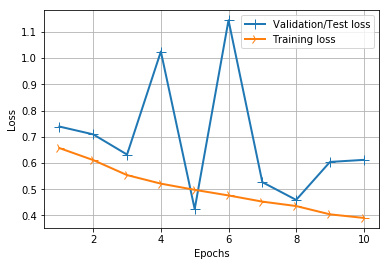

In [21]:
#Plotting our loss & Accuracy Charts
import matplotlib.pyplot as plt

history_dict = model.history

loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
epochs= range(1,len(loss_values)+1)

line1= plt.plot(epochs,val_loss_values, label='Validation/Test loss')
line2= plt.plot(epochs, loss_values, label='Training loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

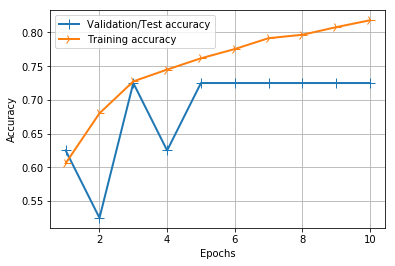

In [22]:
history_dict = model.history

acc_values= history_dict['accuracy']
val_acc_values= history_dict['val_accuracy']
epochs= range(1,len(loss_values)+1)

line1= plt.plot(epochs,val_acc_values, label='Validation/Test accuracy')
line2= plt.plot(epochs, acc_values, label='Training accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()